<a href="https://colab.research.google.com/github/Supriya840/Chess-Playing-Robotic-arm-development/blob/main/PyBullet_arm_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing PyBullet using pip should take around 20 seconds, since we use precompiled Linux wheels.
# For more info, check the PyBullet quickstart guide here:
# https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.2ye70wns7io3

%%time
!pip install pybullet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 4.7 MB/s eta 0:00:00
CPU times: user 382 ms, sys: 55.8 ms, total: 438 ms
Wall time: 34.5 s


In [ ]:
#you can enable the GPU by changing the runtime
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())
#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = False
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

# NOTE: If all your GPUs currently have a memory consumption larger than 1%,
# this step will fail. It's not a bug! It is intended to do so, if it does not
# find an available GPU.
GPUs = GPU.getGPUs()
numGPUs = len(GPU.getGPUs())
print("numGPUs=",numGPUs)
if numGPUs > 0:
  enableGPU = True
eglPluginId = -1
if enableGPU:
  import pkgutil
  egl = pkgutil.get_loader('eglRenderer')
  if (egl):
    eglPluginId = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
  else:
    eglPluginId = p.loadPlugin("eglRendererPlugin")

if eglPluginId>=0:
  print("Using GPU hardware (eglRenderer)")
else:
  print("using CPU renderer (TinyRenderer)")

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=e4b11c4f88fb728db79ead626499ccda14a63eb38c83e479979e94d137a801e5
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
OS: linux
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |
| ID | Name     | Serial        | UUID                                     || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|  0 | Tesla T4 | 1563320020788 | GPU-00cf7cf2-dc6b-9a01-e30b-cad36540420b ||       39C |        0% |           0% ||      15360MB |         0MB |     15101MB

In [ ]:
p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane_pos = [0,0,-0.625]
plane = p.loadURDF("plane.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)
table_pos = [0,0,-0.625]
table = p.loadURDF("table/table.urdf", table_pos, flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("xarm/xarm6_robot.urdf", flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("laikago/laikago_toes.urdf", [1,0,-0.15],[0, 0.5, 0.5, 0], flags = flags, useFixedBase=useFixedBase)



,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


<IPython.core.display.Javascript object>

CPU times: user 2.19 s, sys: 210 ms, total: 2.4 s
Wall time: 5.21 s


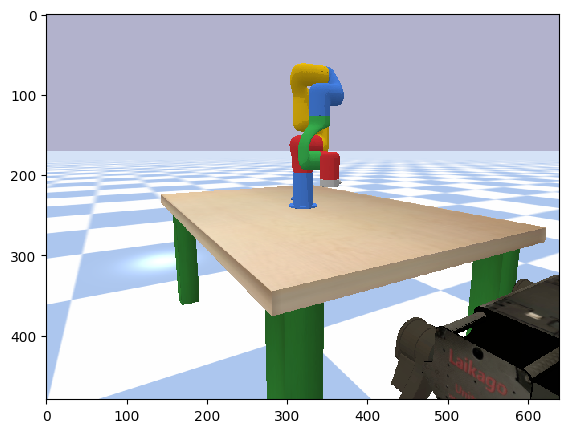

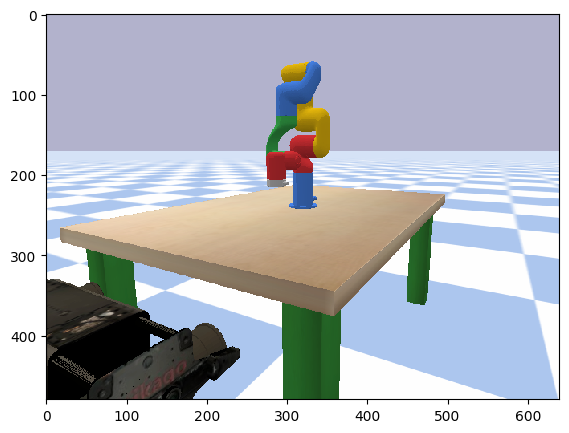

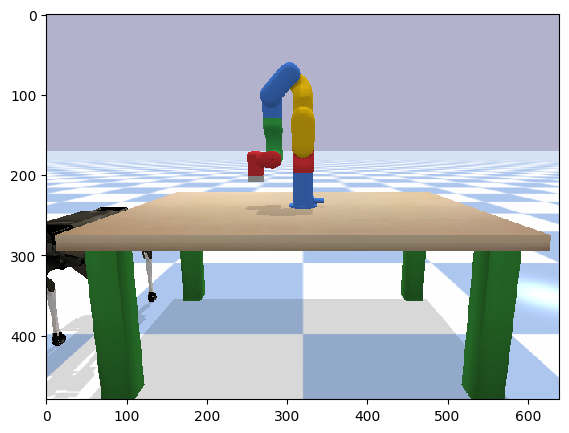

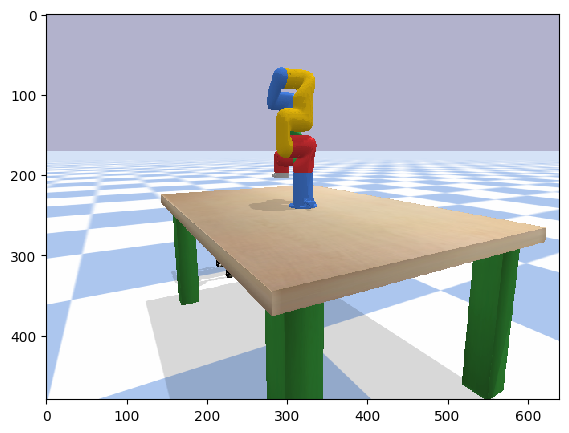

In [ ]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = 0
      upAxisIndex = 2
      camDistance = 1.5
      pixelWidth = 640
      pixelHeight = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                  roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

      img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
      w = img_arr[0]  #width of the image, in pixels
      h = img_arr[1]  #height of the image, in pixels
      rgb = img_arr[2]  #color data RGB
      dep = img_arr[3]  #depth data
      print("w=",w,"h=",h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")





In [ ]:
!pip install numpngw
from numpngw import write_apng
from IPython.display import Image



frames=[] #frames to create animated png
for r in range(60):
    yaw += 6
    pitch = -10.0
    roll = 0
    upAxisIndex = 2
    camDistance = 1.5
    pixelWidth = 320
    pixelHeight = 200
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("example6.png", frames, delay=100)
%time Image(filename="example6.png")